In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotnine as p9
import os
from plotnine import *
from glob import glob
from pathlib import Path
from dgp import *
palette = ['#D55E00', '#E69F00', '#0072B2',
                  '#009E73', '#F0E442', '#CC79A7', '#56B4E9']
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

given a non-linear data generating process, we show that SC can recover valid causal estimate when using aggregate data. This implies that the linearity comes from aggregation.


In [2]:

DS = []
s= 5; k=12; e=5; low =4; high=19;sim=100; n=2000

# print(e)
for t in range(low, high):
    T = t*5
    print(T)
    train_loss1, test_loss1 = [],[]
    train_loss2, test_loss2 = [],[]
    for j in range(sim):
        np.random.seed(j*t)
        Probs = gen_Probs(e,k, s)
        matrix1 = make_matrix(Probs, k, T,  n, summary='median')
        train_loss, test_loss = fit_regression(matrix1, T)
        train_loss1.append(train_loss)
        test_loss1.append(test_loss)

        matrix2 = make_matrix(Probs, k, T, n,  summary='aggregate')
        train_loss, test_loss = fit_regression(matrix2, T)
        train_loss2.append(train_loss)
        test_loss2.append(test_loss)

    means = np.array([np.mean(train_loss1), np.mean(test_loss1), np.mean(train_loss2), np.mean(test_loss2)])
    stds = np.array([np.std(train_loss1), np.std(test_loss1), np.std(train_loss2), np.std(test_loss2)])/np.sqrt(sim)
    group = ['Median Observed','Median Counterfactual', 'Mean Observed','Mean Counterfactual']
    d = {"time": [T]*4, "center":means, "min":abs(means-stds),"max":means+stds, "group":group, 'SE':stds}


    DS.append(pd.DataFrame(data=d))
Data = pd.concat(DS)
    

20
25
30
35
40
45
50
55
60
65
70
75
80
85
90


/Users/claudiashi/miniforge3/envs/pytorch_x86/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 9 x 6 in image.
/Users/claudiashi/miniforge3/envs/pytorch_x86/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ../fig/media_mean_v2.png


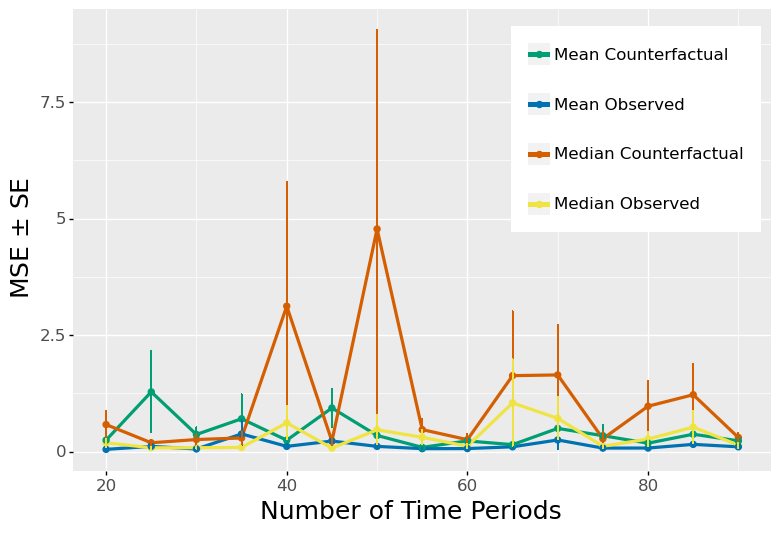

In [9]:
p = ggplot(Data,aes(x='time',y='center',group='group',colour='group')) + \
        geom_line(aes(group='group'),size=1.3) + \
        geom_point(size=2) + \
        geom_errorbar(aes(ymin='min', ymax='max'), width=.2, size=.8) +\
        labs(x=r'Number of Time Periods',y=r'MSE $\pm$ SE') +\
        theme(figure_size=(9, 6),\
            legend_position=(0.75, 0.68),\
            text = element_text(size=12),\
            title=element_text(size=18),\
                legend_title = element_blank(),\
                    legend_entry_spacing_y = 20
            ) +\
        scale_color_manual({'Median Observed':palette[4],
                            'Median Counterfactual':palette[0], 'Mean Observed':palette[2], 
                           'Mean Counterfactual':palette[3]})
    

ggplot.draw(p)
ggplot.save(p, filename = '../fig/'+'media_mean_v2.png')
